# Visualizing Earnings Based On College Majors 

## Part-1 Exploring the Data

In [50]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline

In [51]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [52]:
recent_grads.head()

Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  1207          37   
1      ...              170                   388          85   
2      ...              133                   340          16   
3      ...              150                   692          40   
4      ...             5180                 16697        1672   

   Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0           0.018381  110000  95000  125000          1534               364   
1           0.117241   75000  55000   90000           350               257   
2           0.024096   73000  50000  105000           456               176   
3           0.050125   70000  43000   80000           529               102   
4           0.061098   65000  50000   75000         18314              4440   

   Low_wage_jobs  
0            193  
1             50  
2              0  
3              0  
4            972  

[5 rows x 21 columns]

In [53]:
recent_grads.tail()

Rank  Major_code                   Major   Total     Men   Women  \
168   169        3609                 ZOOLOGY  8409.0  3050.0  5359.0   
169   170        5201  EDUCATIONAL PSYCHOLOGY  2854.0   522.0  2332.0   
170   171        5202     CLINICAL PSYCHOLOGY  2838.0   568.0  2270.0   
171   172        5203   COUNSELING PSYCHOLOGY  4626.0   931.0  3695.0   
172   173        3501         LIBRARY SCIENCE  1098.0   134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  \
168    Biology & Life Science    0.637293           47      6259   
169  Psychology & Social Work    0.817099            7      2125   
170  Psychology & Social Work    0.799859           13      2101   
171  Psychology & Social Work    0.798746           21      3777   
172                 Education    0.877960            2       742   

         ...        Part_time  Full_time_year_round  Unemployed  \
168      ...             2190                  3602         304   
169      ...              572                  1211         148   
170      ...              648                  1293         368   
171      ...              965                  2738         214   
172      ...              237                   410          87   

     Unemployment_rate  Median  P25th  P75th  College_jobs  Non_college_jobs  \
168           0.046320   26000  20000  39000          2771              2947   
169           0.065112   25000  24000  34000          1488               615   
170           0.149048   25000  25000  40000           986               870   
171           0.053621   23400  19200  26000          2403              1245   
172           0.104946   22000  20000  22000           288               338   

     Low_wage_jobs  
168            743  
169             82  
170            622  
171            308  
172            192  

[5 rows x 21 columns]

In [54]:
# To generate the summary statistics of numeric columns
recent_grads.describe()

Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   42869.655092   14648.179473   
min      0.000000     2.000000       0.000000     111.000000       0.000000   
25%      0.336026    39.000000    3608.000000    3154.000000    1030.000000   
50%      0.534024   130.000000   11797.000000   10048.000000    3299.000000   
75%      0.703299   338.000000   31433.000000   25147.000000    9948.000000   
max      0.968954  4212.000000  307933.000000  251540.000000  115172.000000   

       Full_time_year_round    Unemployed  Unemployment_rate         Median  \
count            173.000000    173.000000         173.000000     173.000000   
mean           19694.427746   2416.329480           0.068191   40151.445087   
std            33160.941514   4112.803148           0.030331   11470.181802   
min              111.000000      0.000000           0.000000   22000.000000   
25%             2453.000000    304.000000           0.050306   33000.000000   
50%             7413.000000    893.000000           0.067961   36000.000000   
75%            16891.000000   2393.000000           0.087557   45000.000000   
max           199897.000000  28169.000000           0.177226  110000.000000   

              P25th          P75th   College_jobs  Non_college_jobs  \
count    173.000000     173.000000     173.000000        173.000000   
mean   29501.445087   51494.219653   12322.635838      13284.497110   
std     9166.005235   14906.279740   21299.868863      23789.655363   
min    18500.000000   22000.000000       0.000000          0.000000   
25%    24000.000000   42000.000000    1675.000000       1591.000000   
50%    27000.000000   47000.000000    4390.000000       4595.000000   
75%    33000.000000   60000.000000   14444.000000      11783.000000   
max    95000.000000  125000.000000  151643.000000     148395.000000   

       Low_wage_jobs  
count     173.000000  
mean     3859.017341  
std      6944.998579  
min         0.000000  
25%       340.000000  
50%      1231.000000  
75%      3466.000000  
max     48207.000000

In [55]:
#before dropping rows with missing values
raw_data_count = len(recent_grads)
print("raw data count:",raw_data_count)

raw data count: 173


In [56]:
#after dropping rows with missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print("cleaned data count:",cleaned_data_count)

cleaned data count: 172


There is 1 row with missing values and is dropped. 

## Part 2 
### 1.Generating Scatterplots

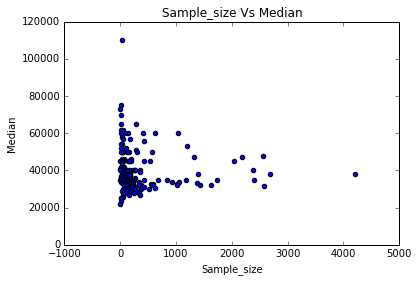

In [57]:
ax=recent_grads.plot(x="Sample_size",y="Median",kind="scatter")
ax.set_title("Sample_size Vs Median")


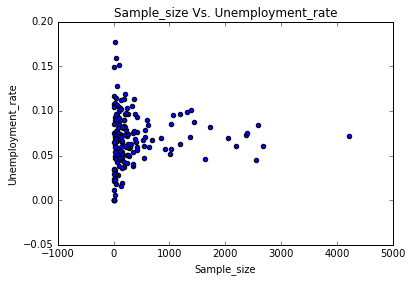

In [58]:
ax=recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter")
ax.set_title("Sample_size Vs. Unemployment_rate")

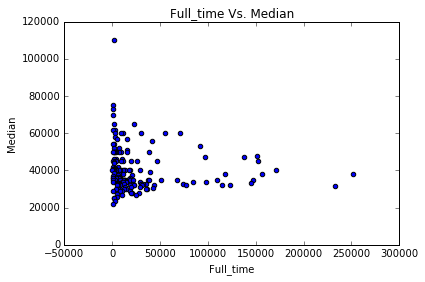

In [59]:
ax=recent_grads.plot(x="Full_time",y="Median",kind="scatter")
ax.set_title("Full_time Vs. Median")

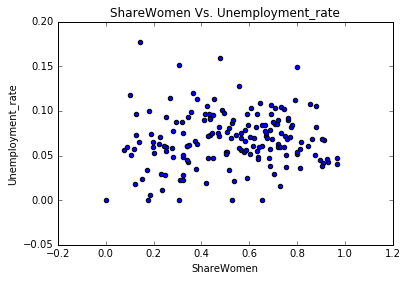

In [60]:
ax=recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter")
ax.set_title("ShareWomen Vs. Unemployment_rate")

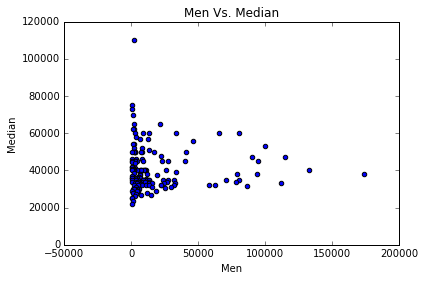

In [61]:
ax=recent_grads.plot(x="Men",y="Median",kind="scatter")
ax.set_title("Men Vs. Median")

### 2.Using scatterplots explore the following questions.
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority     female make more money?
- Is there any link between the number of full-time employees and median salary?

 1.Do students in more popular majors make more money?

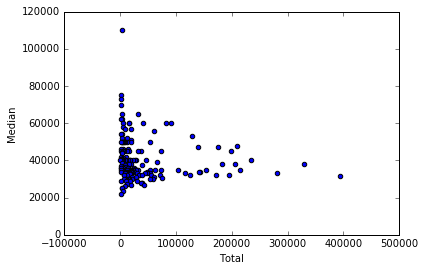

In [62]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

The scatterplot does show a trend to the data and have significant outlier.When we explore the scatterplot we can see that for the same total no of major student (between 0-100000)the median seems to have different values.ie,the values in x axis are irrelevant to the values in y axis.So there is no corelation between total and Median .If the values are irrelevant, then there can't possibly be a correlation between Total  and Median.
No relationship between these two variables.
Therefore,doesnt seems like students with popular major make more money

2.Do students that majored in subjects that were majority female make more money?

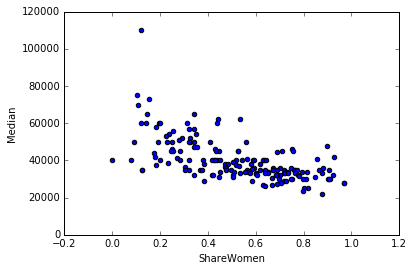

In [63]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

This shows a moderately strong negative linear association.So its definite that female students doesn't make more money than men.

3.Is there any link between the number of full-time employees and median salary?

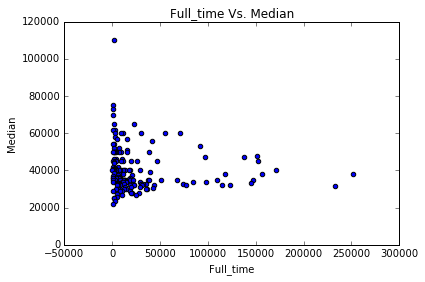

In [64]:
ax=recent_grads.plot(x="Full_time",y="Median",kind="scatter")
ax.set_title("Full_time Vs. Median")

There is a definite trend in data.But for the x axis values (Full-time employees),the y-axis values(median salary) seems to be irrelevant.(for around same x values there are difeerent y values ).So there can't be possible relationship between full time employees and median salary

## Part3 
### 1.Generating Histograms


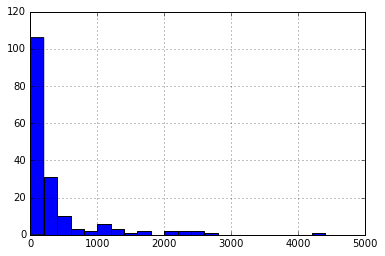

In [65]:
ax=recent_grads['Sample_size'].hist(bins=25,range=(0,5000))



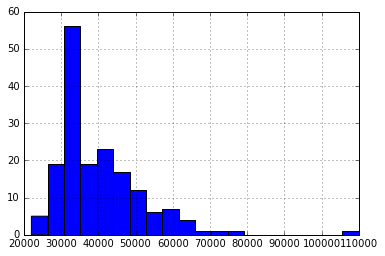

In [66]:
ax=recent_grads['Median'].hist(bins=20)



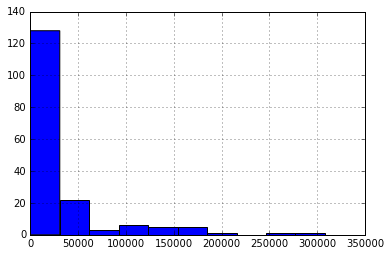

In [67]:
ax=recent_grads['Employed'].hist(bins=10)



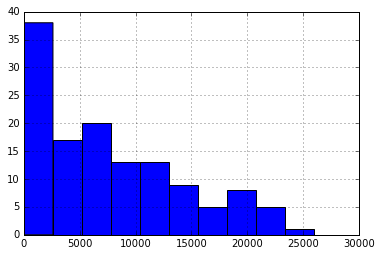

In [68]:
ax=recent_grads['Full_time'].hist(bins=10,range=(0,26000))



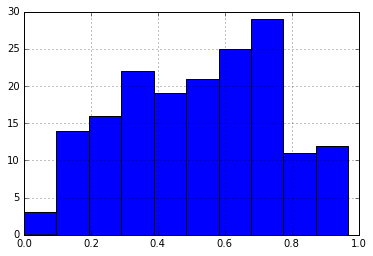

In [69]:
ax=recent_grads['ShareWomen'].hist(bins=10)



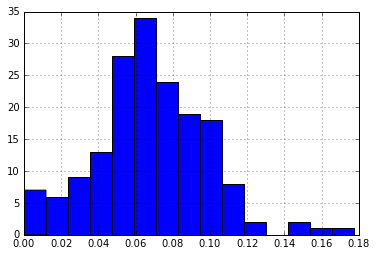

In [70]:
ax=recent_grads['Unemployment_rate'].hist(bins=15)



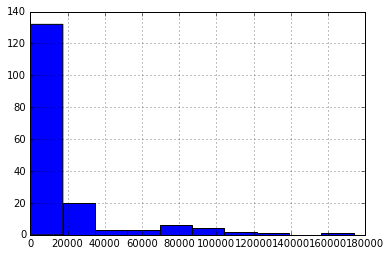

In [71]:
ax=recent_grads['Men'].hist(bins=10)



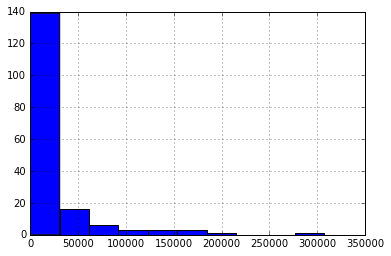

In [72]:
ax=recent_grads['Women'].hist(bins=10)



### 2. Explore the following questions:
- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?


### 1.What percent of majors are predominantly male? Predominantly female?

We can plot the histogram for ShareWomen once again with 2 bins.


(60, 100)

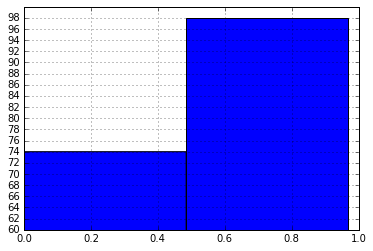

In [73]:

ax=recent_grads['ShareWomen'].hist(bins=2)
ax.set_yticks(np.arange(60,100,step=2))
ax.set_ylim(60,100)


From exploring the histogram,we will consider the part which is greater than 0.5 (>50 %) which is predominantly female.From the graph we can see that there are 98 majors which has predominantly female students.ie, 98 out of 172 majors are female dominant.

Considering the part which is less than 0.5,there are 74 majors which are men dominant.(ie,majors where there are < 50% of female students )ie,74 out of 172 majors.

 Around 57% of majors are predominantly female and around 43% of majors are predominatly men.


### 2.What's the most common median salary range?

We can plot the histogram for Median again.


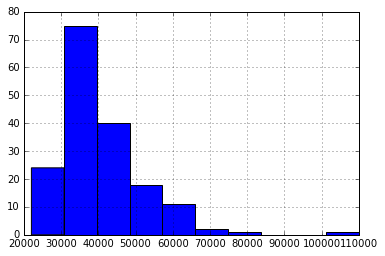

In [74]:
ax=recent_grads['Median'].hist(bins=10)




From observing the plot we can see that the highest frequency count or most of the people's salary fall within the range 30000 - 40000. 
So the most common Median salary range is between 30000 and 40000.

## Part 3: Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969ef887b8>,
      dtype=object)

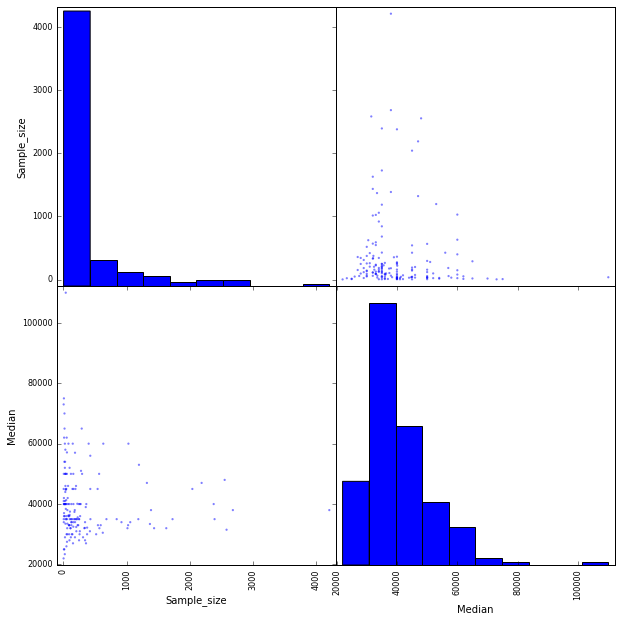

In [75]:
from pandas.plotting import scatter_matrix
# create 2 by 2 scatter matrix plot using Sample_size and Median
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969ec90390>,
      dtype=object)

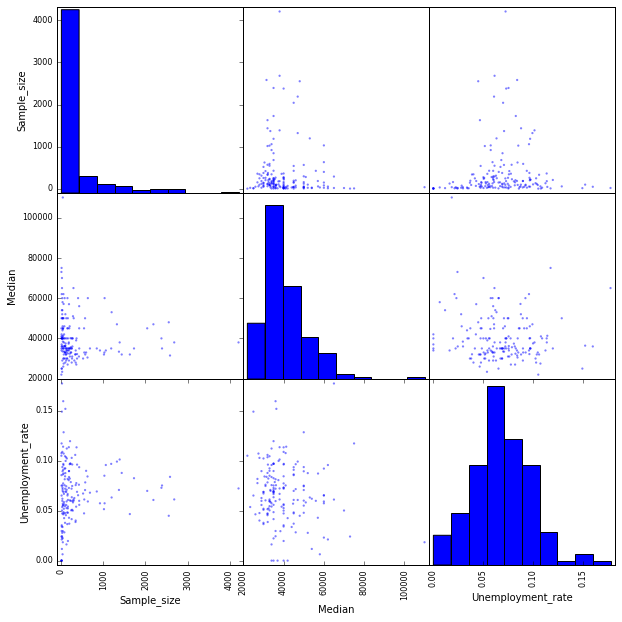

In [76]:
#Create a 3 by 3 scatter matrix plot 
#using the Sample_size, Median, and Unemployment_rate columns.
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))

From the above scatter matrix,we can see that the common median salary range  between 30000 -40000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969f43aa90>,
      dtype=object)

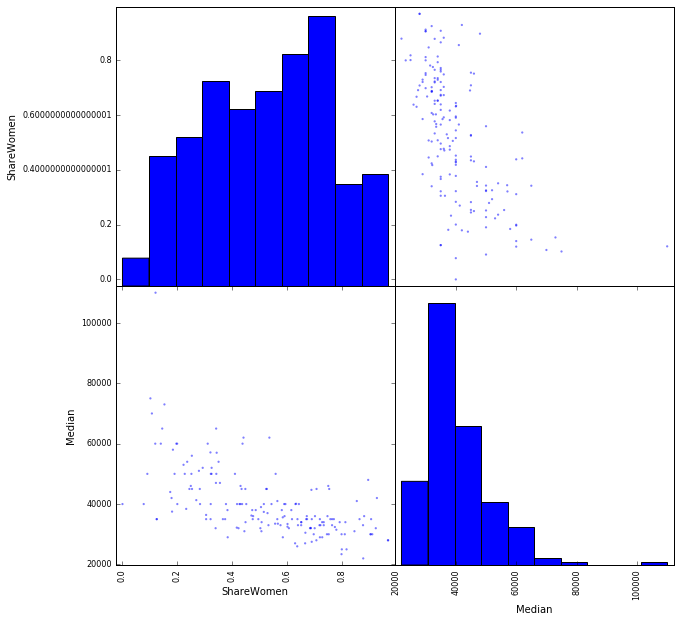

In [77]:
scatter_matrix(recent_grads[['ShareWomen','Median']],figsize=(10,10))

The students that majored in subjects that were majority female doesnt make more money. when we look at the plot ,there is a moderatly strong linear  relationship .As the percentage of women student increases the median salary range decreases.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969f21aa90>,
      dtype=object)

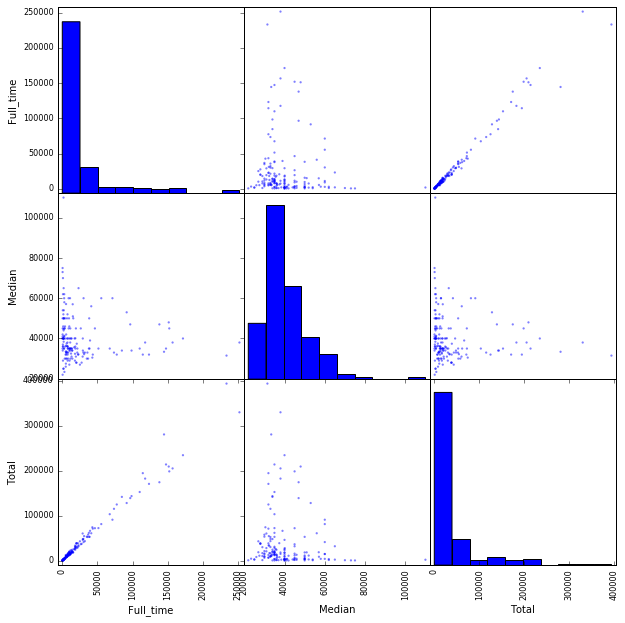

In [78]:
scatter_matrix(recent_grads[['Full_time','Median','Total']],figsize=(10,10))

Exploring full_time and median,it doesnt seem like full_Time employees make more money.
Also there is no relationship seen beween Total and Median,ie,students with popular major doesnt make more money

## Part-5 Bar plots

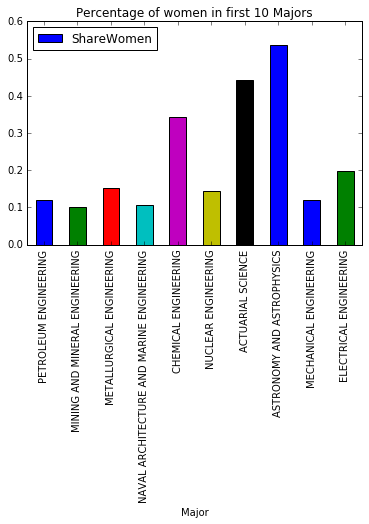

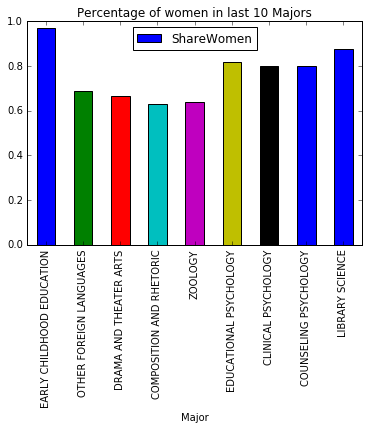

In [79]:
#Use bar plots to compare the percentages of women (ShareWomen) 
#from the first ten rows and last ten rows of the recent_grads dataframe.

recent_grads[:10].plot.bar(x='Major',y='ShareWomen').set_title('Percentage of women in first 10 Majors')
recent_grads[163:].plot.bar(x='Major',y='ShareWomen').set_title('Percentage of women in last 10 Majors')

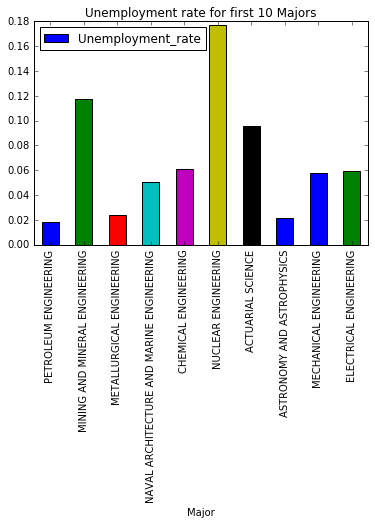

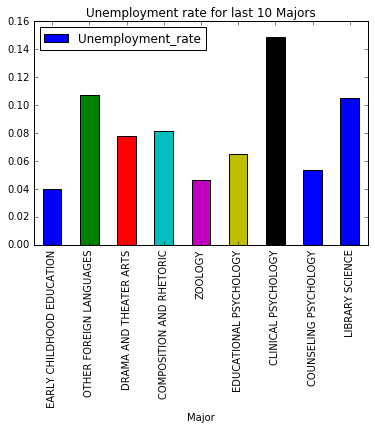

In [80]:
#Use bar plots to compare the unemployment rate (Unemployment_rate) from 
#the first ten rows and last ten rows of the recent_grads dataframe.

recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate').set_title('Unemployment rate for first 10 Majors')
recent_grads[163:].plot.bar(x='Major',y='Unemployment_rate').set_title('Unemployment rate for last 10 Majors')

## Part-6
### 1.Grouped Bar plot

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


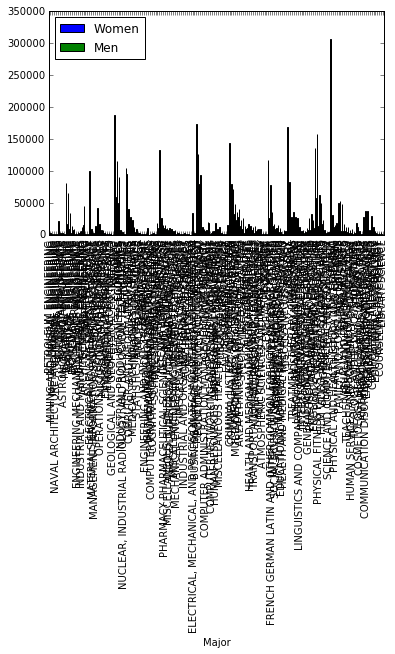

In [84]:
#Use a grouped bar plot to 
#compare the number of men with the number of women in each category of majors.

recent_grad_group=recent_grads[["Major","Women","Men"]]
recent_grad_group.plot.bar(x='Major',y=['Women','Men'])

